In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns



In [9]:
#reading data
df = pd.read_csv('flipkart_data.csv')
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [11]:
#preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)

[nltk_data] Downloading package stopwords to C:\Users\Shalmali
[nltk_data]     Rode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


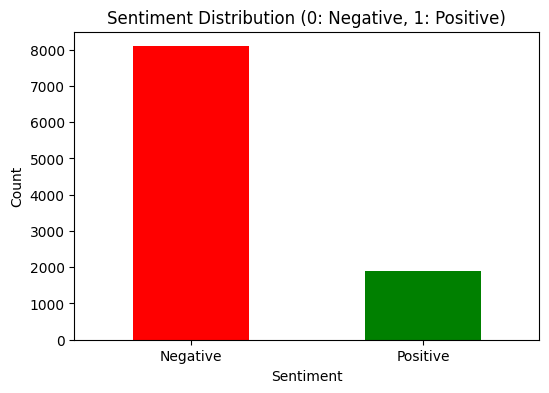

In [12]:
sentiment_counts = df_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

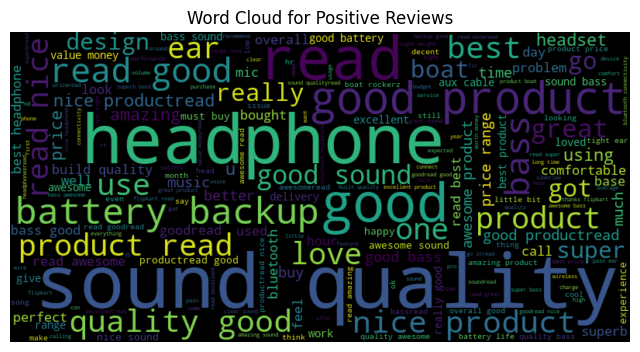

In [13]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [14]:
#convert texts to vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

In [26]:
#test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

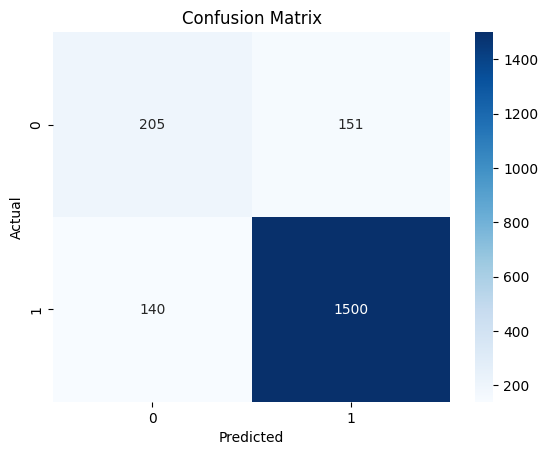

0.8542084168336673
f1 score:
0.8533081961123015


In [27]:
#decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, y_pred, average='weighted')
print("f1 score:")
print(f1_score)

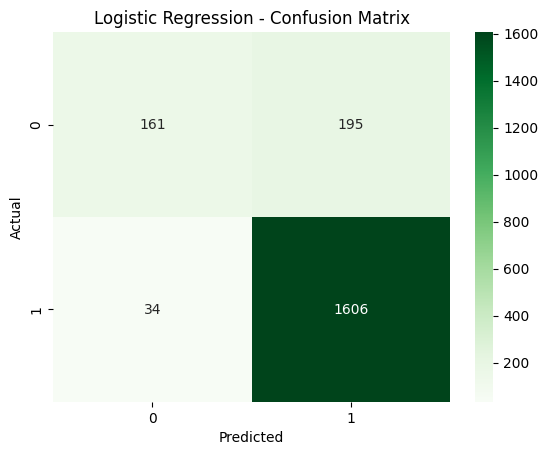

Logistic Regression Accuracy: 0.8852705410821643
f1 score:
0.8533081961123015


In [28]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap="Greens")
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Logistic Regression Accuracy:", accuracy_lr)
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, y_pred, average='weighted')
print("f1 score:")
print(f1_score)

In [29]:
!pip install xgboost

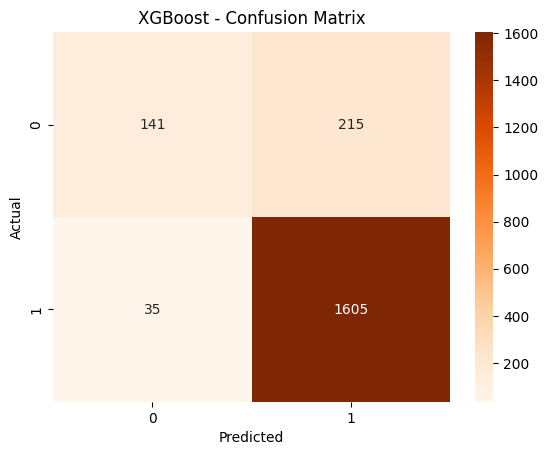

XGBoost Accuracy: 0.874749498997996
f1 score:
0.8533081961123015


In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="Oranges")
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("XGBoost Accuracy:", accuracy_xgb)
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, y_pred, average='weighted')
print("f1 score:")
print(f1_score)

AS seen from above data and the confusion matrix XGBoost performs better than Decision tree and logistic regression ,F1_score=0.853 ,Accuracy:87%